# Import Modules

In [1]:
import cv2

import numpy as np
import matplotlib.pyplot as plt

from skimage import exposure

***
# Initialize and load original image

In [2]:
raw_image = cv2.imread('../images/lenna.png')
# raw_image = cv2.imread('../images/cameraman.png')
# raw_image = cv2.imread('../images/edin_castle.png')
# raw_image = cv2.imread('../images/bowl_fruit.png')
# raw_image = cv2.imread('../images/peppers.png')
# raw_image = cv2.imread('../images/map_of_spain.png')

img_rgb = cv2.cvtColor(raw_image, cv2.COLOR_BGR2RGB)

***
# Display original image and description

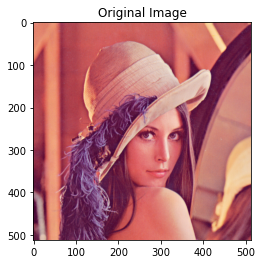

Height        : 512 pixels
Width         : 512 pixels
Color channel : 3 (RGB)


In [3]:
plt.imshow(img_rgb)
plt.title('Original Image')
plt.show()

height, width, color_channel = img_rgb.shape

print(f'Height        : {height} pixels')
print(f'Width         : {width} pixels')
print(f'Color channel : {color_channel} (RGB)')

***
# Display original image histogram

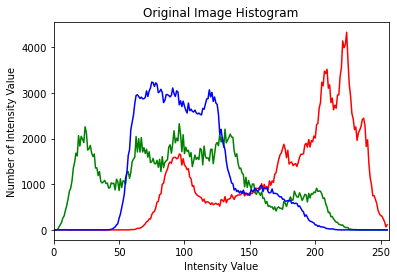

In [4]:
color = ('r', 'g', 'b') 

for i, col in enumerate(color): 
    histr = cv2.calcHist([img_rgb], [i], None, [256], [0, 256])

    plt.plot(histr, color = col)
    plt.xlim([0, 256])

plt.title('Original Image Histogram')
plt.xlabel('Intensity Value')
plt.ylabel('Number of Intensity Value')
plt.show()

***
# Show list value each pixel

In [5]:
img_rgb

array([[[226, 137, 125],
        [226, 137, 125],
        [223, 137, 133],
        ...,
        [230, 148, 122],
        [221, 130, 110],
        [200,  99,  90]],

       [[226, 137, 125],
        [226, 137, 125],
        [223, 137, 133],
        ...,
        [230, 148, 122],
        [221, 130, 110],
        [200,  99,  90]],

       [[226, 137, 125],
        [226, 137, 125],
        [223, 137, 133],
        ...,
        [230, 148, 122],
        [221, 130, 110],
        [200,  99,  90]],

       ...,

       [[ 84,  18,  60],
        [ 84,  18,  60],
        [ 92,  27,  58],
        ...,
        [173,  73,  84],
        [172,  68,  76],
        [177,  62,  79]],

       [[ 82,  22,  57],
        [ 82,  22,  57],
        [ 96,  32,  62],
        ...,
        [179,  70,  79],
        [181,  71,  81],
        [185,  74,  81]],

       [[ 82,  22,  57],
        [ 82,  22,  57],
        [ 96,  32,  62],
        ...,
        [179,  70,  79],
        [181,  71,  81],
        [185,  74,  81]]

***
# Logarithmic transformation

- Formula, sebagai berikut <b>s = c * log(1 + r)</b>
- <b>c</b> adalah kontanta yang didapatkan melalui formula, berikut <b>255 / log(1 + m)</b>
- <b>m</b> adalah nilai piksel tertinggi dari gambar yang digunakan sebagai input
- Nilai piksel yang berada pada rentang abu-abu yang jumlah kecil akan ditingkatkan nilainya, sehingga menjadi lebih terlihat

### - Calculate constant

In [6]:
c = 255 / (np.log(1 + np.max(img_rgb)))

print(f'Constant value             : {c}')
print(f'Max value pixel from image : {np.max(img_rgb)}')

Constant value             : 45.98590442833571
Max value pixel from image : 255


### - Calculate logarithmic transformation

In [7]:
log_transformed = c * np.log(255 + img_rgb)

### - Specify the data type

In [8]:
log_transformed = np.array(log_transformed, dtype=np.uint8)

### - Show value of log_transformed variable

In [9]:
log_transformed

array([[[249, 226, 221],
        [249, 226, 221],
        [248, 226, 224],
        ...,
        [250, 229, 220],
        [248, 223, 215],
        [243, 211, 206]],

       [[249, 226, 221],
        [249, 226, 221],
        [248, 226, 224],
        ...,
        [250, 229, 220],
        [248, 223, 215],
        [243, 211, 206]],

       [[249, 226, 221],
        [249, 226, 221],
        [248, 226, 224],
        ...,
        [250, 229, 220],
        [248, 223, 215],
        [243, 211, 206]],

       ...,

       [[203, 130, 187],
        [203, 130, 187],
        [207, 149, 186],
        ...,
        [236, 196, 203],
        [236, 193, 198],
        [237, 189, 200]],

       [[202, 140, 185],
        [202, 140, 185],
        [209, 158, 189],
        ...,
        [238, 194, 200],
        [238, 195, 201],
        [239, 197, 201]],

       [[202, 140, 185],
        [202, 140, 185],
        [209, 158, 189],
        ...,
        [238, 194, 200],
        [238, 195, 201],
        [239, 197, 201]]

### - Display image with logarithmic transformation

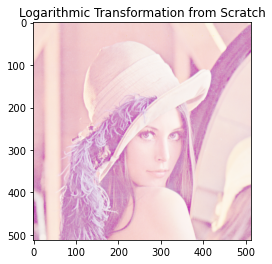

In [10]:
plt.imshow(log_transformed)
plt.title('Logarithmic Transformation from Scratch')
plt.show()

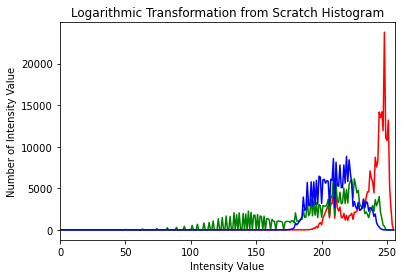

In [11]:
color = ('r', 'g', 'b') 

for i, col in enumerate(color): 
    histr = cv2.calcHist([log_transformed], [i], None, [256], [0, 256])

    plt.plot(histr, color = col)
    plt.xlim([0, 256])

plt.title('Logarithmic Transformation from Scratch Histogram')
plt.xlabel('Intensity Value')
plt.ylabel('Number of Intensity Value')
plt.show()

***
# With image processing module

### - Logarithmic transformation image with scikit-image module

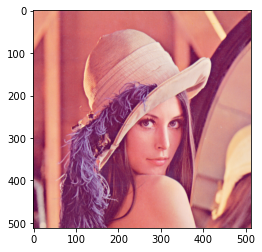

In [12]:
logarithmic_corrected = exposure.adjust_log(image=img_rgb, gain=1)
plt.imshow(logarithmic_corrected)
plt.show()

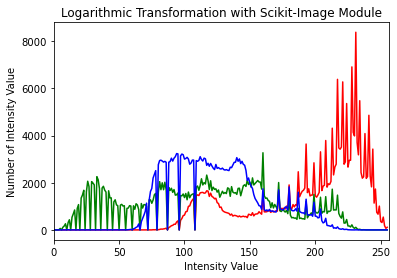

In [13]:
color = ('r', 'g', 'b') 

for i, col in enumerate(color): 
    histr = cv2.calcHist([logarithmic_corrected], [i], None, [256], [0, 256])

    plt.plot(histr, color = col)
    plt.xlim([0, 256])

plt.title('Logarithmic Transformation with Scikit-Image Module')
plt.xlabel('Intensity Value')
plt.ylabel('Number of Intensity Value')
plt.show()